# **Título**

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./..')

from image_gen import GenerativeModel
from image_gen.diffusion import VarianceExploding, VariancePreserving, SubVariancePreserving
from image_gen.noise import LinearNoiseSchedule, CosineNoiseSchedule
from image_gen.samplers import EulerMaruyama, ExponentialIntegrator, ODEProbabilityFlow, PredictorCorrector

import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\samplers\euler_maruyama.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
diffusion_model = "ve"
noise_schedule = "l"
sampler = "euler"

schedule_map = {
    "l": LinearNoiseSchedule(beta_min=0.0001, beta_max=10),
    "c": CosineNoiseSchedule(beta_max=0.9999)
}
diffusion_map = {
    "ve": VarianceExploding,
    "vp": VariancePreserving,
    "svp": SubVariancePreserving
}
sampler_map = {
    "euler": EulerMaruyama,
    "exp": ExponentialIntegrator,
    "ode": ODEProbabilityFlow,
    "pc": PredictorCorrector
}

model = GenerativeModel(
    diffusion=diffusion_map.get(diffusion_model),
    sampler=sampler_map.get(sampler),
    noise_schedule=schedule_map.get(noise_schedule)
)

if diffusion_model != 've':
    diffusion_model = f"{diffusion_model}_{noise_schedule}"

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\base.py:83: UserWarning: VarianceExploding does not require a noise schedule. The provided noise schedule will be ignored.
  warnings.warn(


In [3]:
CLASSES = ('airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
def get_cifar_dataset(class_id=None):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    train_dataset = datasets.CIFAR10(
        root='./data', 
        train=True,
        download=True,
        transform=transform
    )
    
    if class_id is not None: 
        targets = torch.tensor(train_dataset.targets)
        idx = (targets == class_id).nonzero().flatten()
        
        train_dataset = torch.utils.data.Subset(train_dataset, idx)
        print(f"Selected {len(train_dataset)} images of class: {CLASSES[class_id]}")
    
    return train_dataset

In [5]:
class_id = 1
dataset = get_cifar_dataset(class_id=class_id)

Selected 5000 images of class: car


In [ ]:
epochs = 1000
model.train(dataset, epochs=epochs)
model.save(f'cifar10_{CLASSES[class_id]}_{epochs}e_{diffusion_model}_{sampler}.pth')
# model.load(f'cifar10_{CLASSES[class_id]}_{epochs}e_{diffusion_model}_{sampler}.pth')

Training:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 11:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 12:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 13:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 14:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 15:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 16:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 17:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 18:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 19:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 20:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 21:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 22:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 23:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 24:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 25:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 26:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 27:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 28:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 29:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 31:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 32:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 33:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 34:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 35:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 36:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 37:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 38:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 39:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 41:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 42:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 43:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 44:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 45:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 46:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 47:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 48:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 49:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 50:   0%|          | 0/157 [00:00<?, ?it/s]

In [7]:
n_images = 16
samples = model.generate(n_images)

Generating:   0%|          | 0/500 [00:00<?, ?it/s]

Step 0: t=1.000, mean=-0.000, std=1.488
Step 50: t=0.900, mean=0.090, std=4.398
Step 100: t=0.800, mean=0.120, std=3.861
Step 150: t=0.700, mean=0.144, std=3.146
Step 200: t=0.600, mean=0.161, std=2.443
Step 250: t=0.501, mean=0.181, std=1.855
Step 300: t=0.401, mean=0.178, std=1.380
Step 350: t=0.301, mean=0.181, std=1.016
Step 400: t=0.201, mean=0.181, std=0.746
Step 450: t=0.101, mean=0.175, std=0.549


In [8]:
def show_images(images, n_images=4, contrast=1.0):
    images = images[:n_images]  # Select only the first n_images
    images = images.permute(0, 2, 3, 1).cpu().detach().numpy()
    images = (images + 1) / 2  # Scale from [-1,1] to [0,1]
    
    # Convert to grayscale intensity for proper contrast scaling
    mean = images.mean(axis=(1, 2, 3), keepdims=True)
    std = images.std(axis=(1, 2, 3), keepdims=True) + 1e-6  # Avoid division by zero

    # Adjust contrast properly
    images = mean + contrast * (images - mean)
    images = np.clip(images, 0, 1)  # Ensure values remain in [0,1]

    grid_size = int(np.sqrt(n_images))  # Ensure a square-like grid
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(4, 4))
    axes = axes.flatten()
    
    for idx, img in enumerate(images):
        axes[idx].imshow(img)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

In [9]:
def visualize_cifar_images(dataset, n_images=4):
    fig, axes = plt.subplots(int(np.sqrt(n_images)), int(np.sqrt(n_images)), figsize=(4, 4))
    axes = axes.flatten()
    
    for i in range(n_images):
        img, label = dataset[i]  # Get image and label
        img = img.permute(1, 2, 0).numpy()  # Convert to (H, W, C)
        img = (img + 1) / 2  # Rescale from [-1, 1] to [0, 1]
        
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

### Originales

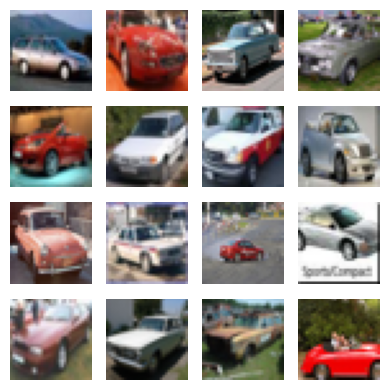

In [10]:
visualize_cifar_images(dataset, n_images=n_images)

### Generadas

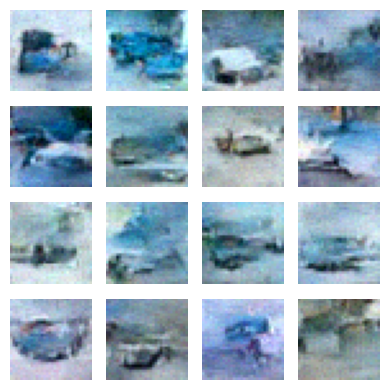

In [11]:
show_images(samples, n_images=n_images, contrast=1)